# __Create your first DFN__

### Problem statement
The fractured system is conceptualized as a population of individual fractures (surfaces), which are embedded in a spatial domain (volume).
<br>
We here create a DFN with fractures consisting of two different kinds: 
- deterministic fractures, by which we mean a fracture that has no random component in terms of geometry (but might obtain in terms of properties)
- stochastic fractures with geometric properties stemming from statistical distributions

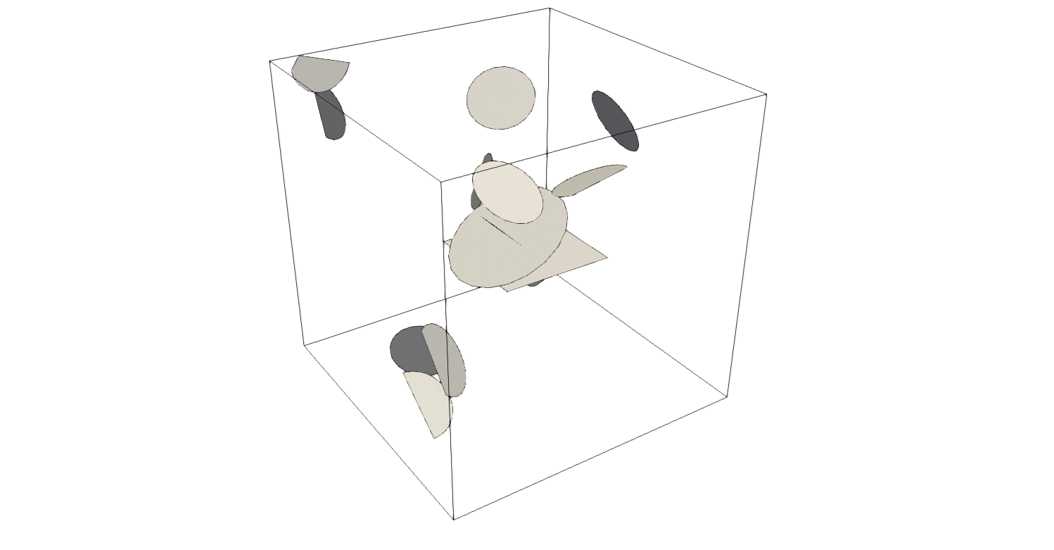
<center>
    Simple DFN made of fracture disks and polygons
</center>

### What will you learn ?
- Create deterministic fractures
- Create stochastic fractures
- Create a DFN by loading a list of fractures

### DFN.Lab model

In this example, fractures are disk-shaped or polygon-shaped. They are then embedded into a domain to create a DFN. Fractures that intersect with the boundaries are truncated at domain boundaries.
<br>
Dimension can be anything, but we will consider meters here.
<br>
You should be familiar with tutorial ["Create a domain"](001-Create_domain.ipynb).

The required modules are __Basis__, __Geometry__ and __RandomGenerator__.
<br>
We use [_pyvista_](https://docs.pyvista.org) for embedded visualization in our notebook.
<br>
Plot functions are implemented in [Tutorials/sources/functions.py](sources/functions.py).

In [1]:
import dfnlab.Basis as basis
import dfnlab.Geometry as geometry
import dfnlab.RandomGenerator as random
import os 

_____________

## Initialize a DFN
We first define a cubic domain of size 10m, centered in (0,0,0).

In [2]:
the_system = basis.System()
the_system.buildParallelepiped(center=[0.,0.,0.], L1=10., L2=10., L3=10.)

A DFN is defined as a a population of fractures embedded in a domain.
<br>
We create an empty _DFN_ object linked to the domain _the_system_. 

In [3]:
fnet = basis.DFN(the_system)

## Create deterministic fractures
You can create a deterministic fracture as a polygon (defined by points along its edge).

In [4]:
pol = geometry.Polygon()
pol.append([0, 0, -2])
pol.append([4, 0, -2])
pol.append([4, 4, -2])
pol.append([0, 4, -2])
fpol = basis.Fracture(pol)

You can access its properties, e.g. size:

In [5]:
print("Fracture size is {}".format(fpol.getSize()))
print("Fracture area is {}".format(fpol.getArea()))

Fracture size is 5.656854249492381
Fracture area is 16.0


Add it into yout DFN.

In [6]:
fnet.addFracture(fpol);

And visualize it 

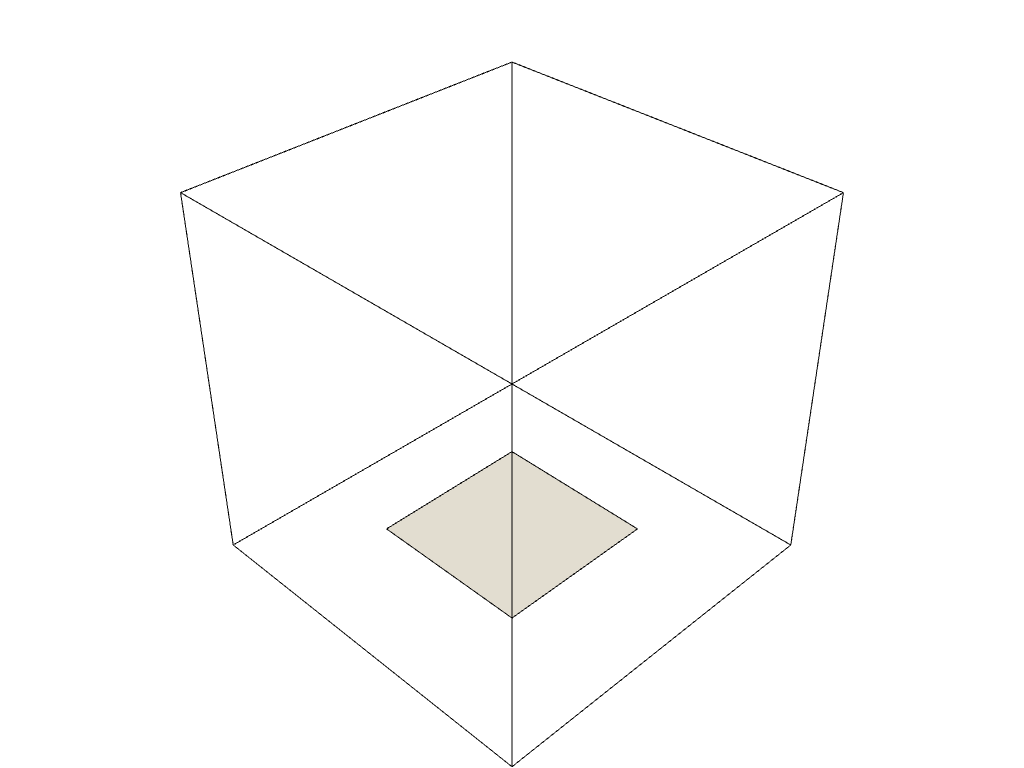

In [7]:
from sources.functions import plot_dfn

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
    
plot_dfn(fnet,pathFolder+"/tuto3_dfn1")

You can also create a disk-shaped _Fracture_, defined by its position (the disk center) and its orientation given as dip and dip direction angles.

In [8]:
fdisk1 = basis.Fracture(position=[0, 0, 0], size=2., dip=45., dipd=90., index=0)

print("Fracture size is {}".format(fdisk1.getSize()))
print("Fracture area is {}".format(fdisk1.getArea()))

Fracture size is 2.0
Fracture area is 3.141592653589793


Alternatively, the orientation of the fracture can be defined in terms of its pole (normal).<br>
There are utility functions to get a normal vector from dip and dip direction angles.

In [9]:
the_normal = basis.IFracture.orientations(30., 270.)
fdisk2 = basis.Fracture(position=[0, 0, 0], size=4., normal=the_normal, index=1)

print("Fracture size is {}".format(fdisk2.getSize()))
print("Fracture area is {}".format(fdisk2.getArea()))

Fracture size is 4.0
Fracture area is 12.566370614359172


Add them into the DFN.

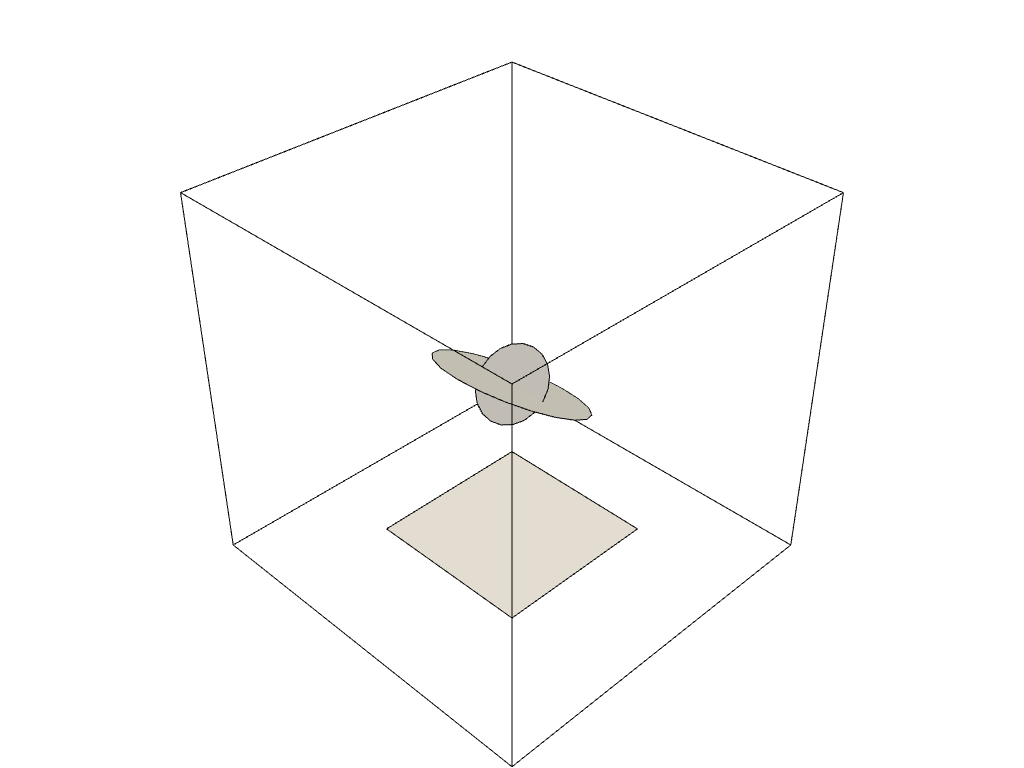

In [10]:
fnet.addFractures([fdisk1,fdisk2]);
plot_dfn(fnet,pathFolder+"/tuto3_dfn2")

## Create stochastic fractures
Here we create 10 disk fractures of diameter 2m with random positions lying in the system box, and random orientation (uniform).

First we create a statistical distribution (of numerical seed 1000).

In [11]:
stat=random.StatisticalDistribution(1000)

We need to get the corner positions of the system box. We use the mininmum (xmin,ymin,zmin) and maximum (xmax,ymax,zmax) corners to do so.

In [12]:
pmin=the_system.getPMin()
pmax=the_system.getPMax()

You can then make lists of fractures using loops.

In [13]:
fractureList = []
for i in range(0,11):
    pos = [stat.randomDouble(pmin[0],pmax[0]),stat.randomDouble(pmin[1],pmax[1]),stat.randomDouble(pmin[2],pmax[2])]
    normal = stat.randomUnisphere()
    fd = basis.Fracture(position=pos, size=2., normal=normal)
    fractureList.append(fd)

You can add an entire list of fractures into the DFN. 
<br>
Fractures are automatically truncated at the edges of the domain.

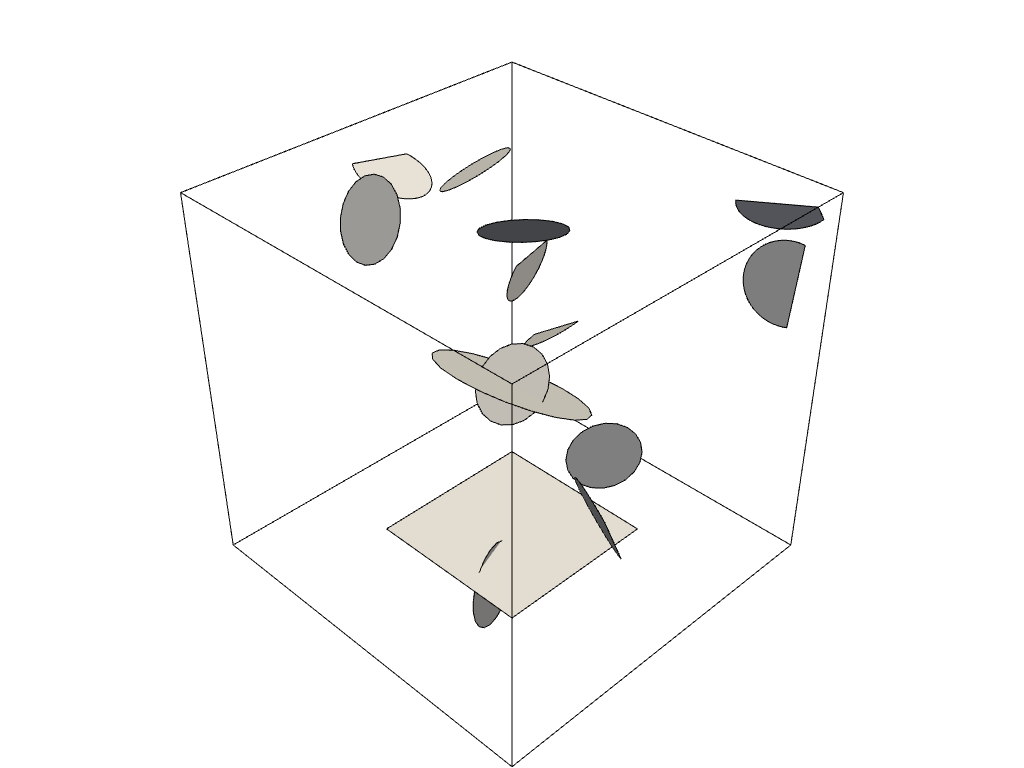

In [14]:
fnet.addFractures(fractureList);
plot_dfn(fnet,pathFolder+"/tuto3_dfn2")

The generation of fully stochastic DFN, using a generator object defined by statistical distributions is explained in the another tutorial.